In [1]:
import pandas as pd
import numpy as np

# Load the Prediction Result

In [2]:
result_file = './submission.csv'
all_file = 'E:/CS340 Project/CS340 Project/Data/all_data.csv'

In [3]:
df_result = pd.read_csv(result_file)
df_all = pd.read_csv(all_file)

In [4]:
merged_df = pd.merge(df_result, df_all, on='id', how='left')
merged_df.head

<bound method NDFrame.head of             id  prediction                                       comment_text  \
0      7097320    0.019056  [ Integrity means that you pay your debts.]\n\...   
1      7097321    0.023297  This is malfeasance by the Administrator and t...   
2      7097322    0.076458  @Rmiller101 - Spoken like a true elitist. But ...   
3      7097323    0.012670  Paul: Thank you for your kind words.  I do, in...   
4      7097324    0.010035  Sorry you missed high school. Eisenhower sent ...   
...        ...         ...                                                ...   
97315  7194635    0.022421  He should lose his job for promoting mis-infor...   
97316  7194636    0.018894  "Thinning project is meant to lower fire dange...   
97317  7194637    0.065455  I hope you millennials are happy that you put ...   
97318  7194638    0.154633  I'm thinking Kellyanne Conway (a.k.a. The Trum...   
97319  7194639    0.008780  I still can't figure why a pizza in AK cost mo...  

# Value Alignment

In [5]:
pd.set_option('max_colwidth', 1024)
sd = np.random.seed(seed=42)  

In [6]:
merged_df['toxic'] = merged_df['prediction'].apply(lambda x: True if x >= 0.5 else False)
groups = merged_df.groupby('toxic')
selection = groups.apply(lambda x: x.sample(n=5, random_state = sd),include_groups=False)

In [7]:
selection

id  prediction  \
toxic                              
False 42553  7139873    0.010027   
      81014  7178334    0.018916   
      62119  7159439    0.483552   
      83043  7180363    0.012137   
      39056  7136376    0.044660   
True  40912  7138232    0.552151   
      89155  7186475    0.970039   
      61095  7158415    0.944953   
      16534  7113854    0.530866   
      2577   7099897    0.903774   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       comment_text  \
toxic                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
False 42553                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Well that's why we have one iota of interest in the region in the first place - oil, so as GWB proudly proclaimed - mission accomplished!   
      81014                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                I'm not sure it's in good taste to promote travel to this area so soon after the airport shooting there.   
      62119  I get a kick out of the MSM. The media and corrupt establishment are doing everything they can to de-legitimize Trump's presidency, from supporting partisan judicial decisions to undermining his rightful authority over the intelligence agencies and then they have the audacity to say Trump is "having trouble organizing his government"!\n\nDonald Trump is keeping his promises to his base at a time when one 

In [8]:
selection.to_csv('selection.csv',encoding='utf-8')

# Visualising Identity Variables

In [9]:
import matplotlib.pyplot as plt

In [10]:
gender = ['male', 'female', 'bisexual', 'homosexual_gay_or_lesbian', 'heterosexual',
        'transgender', 'other_gender', 'other_sexual_orientation']
race = ['black','white','asian','latino','hindu','other_race_or_ethnicity']
religion = ['atheist','buddhist', 'christian', 'jewish', 'muslim', 'other_religion']
disability = ['physical_disability', 'psychiatric_or_mental_illness',
        'intellectual_or_learning_disability', 'other_disability']

In [11]:
def draw(df,type_list):
    type_counts = {}
    for i in type_list:
        cnt = len(df[(df[i] == True)])
        type_counts[i] = cnt
    return dict(type_counts)

In [12]:
race_cnt = draw(merged_df,race)
gender_cnt = draw(merged_df,gender)
religion_cnt = draw(merged_df,religion)
disability_cnt = draw(merged_df,disability)

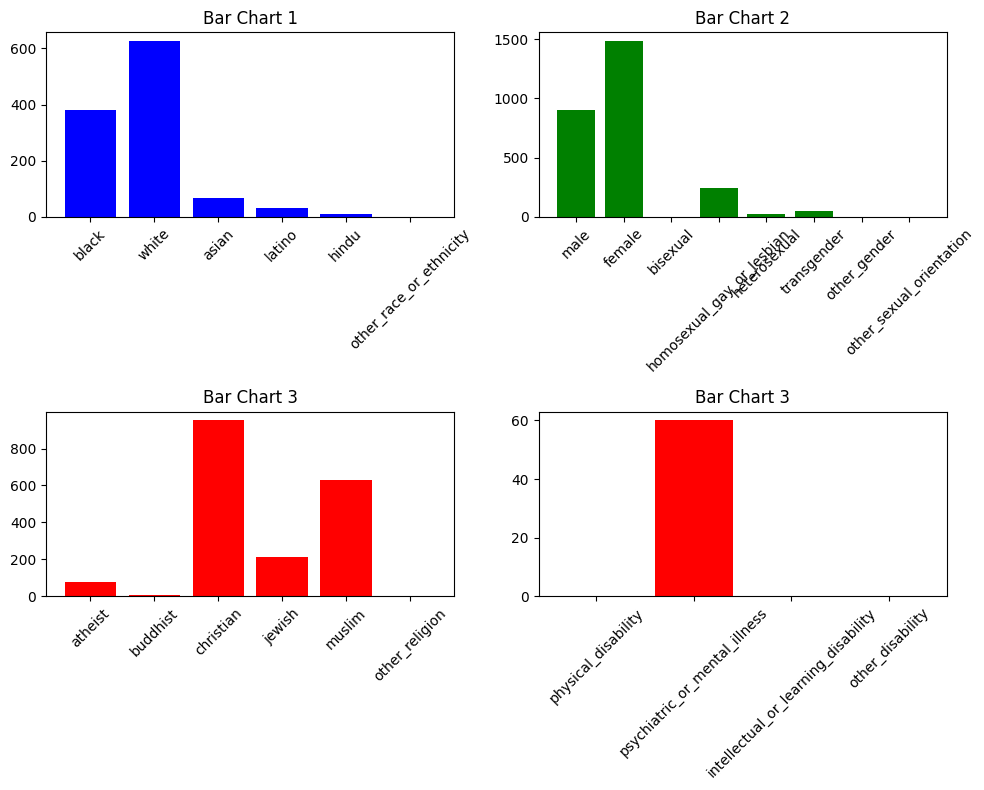

In [13]:
# Set up the figure and subplots
fig, axs = plt.subplots(2,2, figsize=(10, 8))
axs = axs.flatten()
# Plotting the bar charts for each dictionary variable
axs[0].bar(race_cnt.keys(), race_cnt.values(), color='blue')
axs[0].tick_params(axis='x', rotation=45) 
axs[0].set_title('Bar Chart 1')

axs[1].bar(gender_cnt.keys(),gender_cnt.values(), color='green')
axs[1].tick_params(axis='x', rotation=45) 
axs[1].set_title('Bar Chart 2')

axs[2].bar(religion_cnt.keys(), religion_cnt.values(), color='red')
axs[2].tick_params(axis='x', rotation=45) 
axs[2].set_title('Bar Chart 3')

axs[3].bar(disability_cnt.keys(), disability_cnt.values(), color='red')
axs[3].tick_params(axis='x', rotation=45) 
axs[3].set_title('Bar Chart 3')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Bias Evaluate

In [14]:
identity_columns = [
    'male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish',
    'muslim', 'black', 'white', 'psychiatric_or_mental_illness']

In [15]:
# Convert taget and identity columns to booleans
def convert_to_bool(df, col_name):
    df[col_name] = np.where(df[col_name] >= 0.5, True, False)
    
def convert_dataframe_to_bool(df):
    bool_df = df.copy()
    for col in ['prediction'] + identity_columns:
        convert_to_bool(bool_df, col)
    return bool_df

merged_df = convert_dataframe_to_bool(merged_df)

In [16]:
def demographic_parity_positive(df, attribute, target):
    predicted_positive = len(df[(df[attribute] == True) & (df[target] == True) ])
    demographic_parity = predicted_positive / len(df)
    return demographic_parity

In [17]:
demographic_parity_positive_list = {}
for i in identity_columns:
    demographic_parity_value = demographic_parity_positive(merged_df, i, 'prediction')
    demographic_parity_positive_list[i] = demographic_parity_value

In [18]:
print("Demographic Parity:")
sorted_demo = sorted(demographic_parity_positive_list.items(), key=lambda x: x[1],reverse=True)
for i in sorted_demo:
    print(f'{i[0]}  {i[1]}')

print(f"Demographic Parity Difference:  {sorted_demo[0][1] - sorted_demo[-1][1] }")
print(f"Demographic Parity Ratio:  {sorted_demo[-1][1] / sorted_demo[0][1]}")

Demographic Parity:
white  0.0031031648170982327
male  0.0027024249897246197
female  0.00249691738594328
black  0.002013974517057131
muslim  0.0017159884915741881
christian  0.0014282778462803125
homosexual_gay_or_lesbian  0.0011302918207973696
jewish  0.0005240443896424167
psychiatric_or_mental_illness  0.0004521167283189478
Demographic Parity Difference:  0.0026510480887792847
Demographic Parity Ratio:  0.1456953642384106
